In [63]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.metrics import classification_report

### Load Dataset

In [66]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [67]:
train_df.shape

(60000, 785)

In [68]:
test_df.shape

(10000, 785)

### Preprocess Data  
Convert each image of 784 into (28x28x1)(height x width x color_channels). Divide values by 255 to scale the values.

In [70]:
# Get the labels (target variable) and pixel values (features)
x_train = train_df.iloc[:, 1:].to_numpy()
y_train = train_df.iloc[:, 0].to_numpy()
x_test = test_df.iloc[:, 1:].to_numpy()
y_test = test_df.iloc[:, 0].to_numpy()

In [71]:
# Reshape the images from 784 pixels (28x28) into 28x28x1 (grayscale)
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])

In [72]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [73]:
# Class names corresponding to the labels (0-9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Visualization

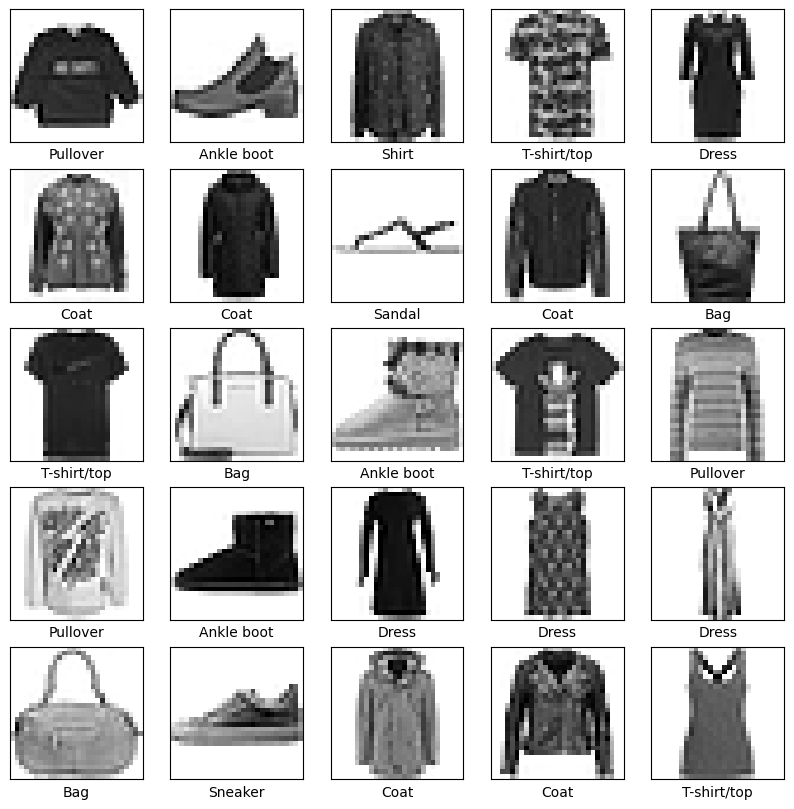

In [75]:
# Plot the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


### Model Building

In [77]:
model = Sequential()

In [78]:
# Convolutional Layer + MaxPooling + Dropout
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

C:\Users\91776\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  # Softmax for multi-class classification


In [91]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [93]:
# Display the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │         346,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,114 (1.32 MB)

 Trainable params: 347,114 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING THE MODEL 

In [96]:
# Train the model with 50 epochs and a batch size of 1200
history = model.fit(x_train, y_train, epochs=50, batch_size=1200, validation_split=0.05)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.5116 - loss: 1.4131 - val_accuracy: 0.8013 - val_loss: 0.5591
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.8229 - loss: 0.5057 - val_accuracy: 0.8283 - val_loss: 0.4707
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.8524 - loss: 0.4249 - val_accuracy: 0.8560 - val_loss: 0.4093
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.8649 - loss: 0.3873 - val_accuracy: 0.8633 - val_loss: 0.3805
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.8723 - loss: 0.3659 - val_accuracy: 0.8720 - val_loss: 0.3614
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.8806 - loss: 0.3429 - val_accuracy: 0.8783 - val_loss: 0.3470
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.8833 - loss: 0.3302 - val_accuracy: 0.8860 - val_loss: 0.3296
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.8917 - loss: 0.3127 - val_accuracy: 0.

### Evaluation

In [99]:
# Evaluate the model on the test set
evaluation = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {evaluation[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9153 - loss: 0.2409
Test Accuracy: 0.919700026512146


MAKING PREDICTIONS

In [102]:
# Get the predicted class labels
y_probas = model.predict(x_test)
y_pred = y_probas.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


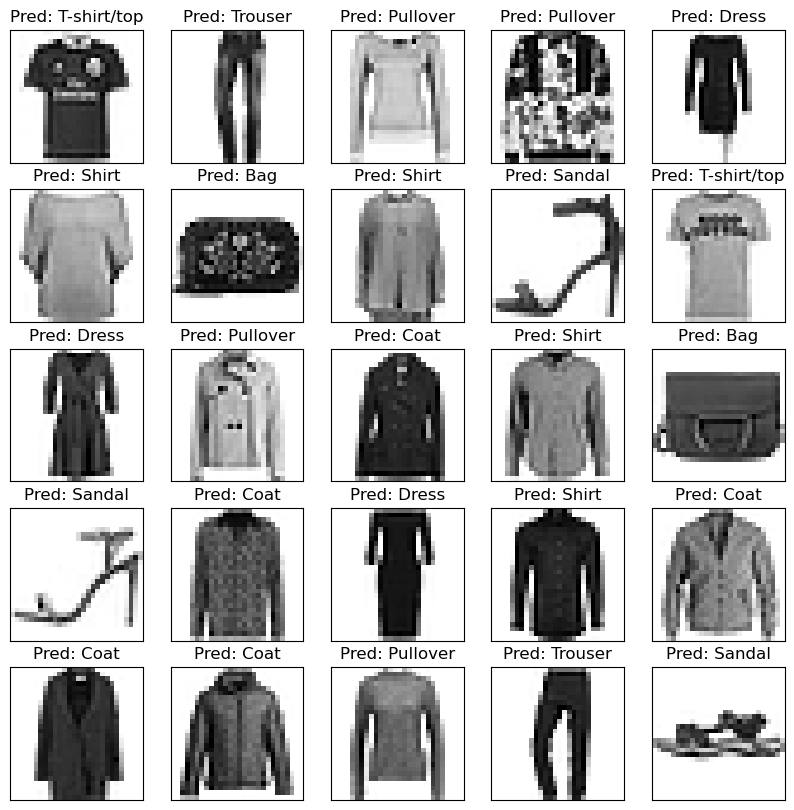

In [103]:
# Visualize some of the test images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Pred: {class_names[y_pred[i]]}")
plt.show()

In [106]:
# Print classification report
num_classes = 10
class_names_report = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names_report)
print(cr)

              precision    recall  f1-score   support

     class 0       0.86      0.86      0.86      1000
     class 1       0.98      0.98      0.98      1000
     class 2       0.90      0.86      0.88      1000
     class 3       0.92      0.93      0.93      1000
     class 4       0.89      0.89      0.89      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.76      0.79      0.78      1000
     class 7       0.95      0.97      0.96      1000
     class 8       0.99      0.97      0.98      1000
     class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

